In [3]:
import os
import glob
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler

# Set the directory paths
dataset_dir = 'C:\\Users\\SaneleMbedu\\Downloads\\trainingdata\\datasets1'
images_dir = os.path.join(dataset_dir, 'images')
labels_dir = os.path.join(dataset_dir, 'labels')

# Define the number of classes and class names
num_classes = 1
class_names = ['box']

# Initialize lists to store the loaded images and labels
images = []
labels = []

# Load images
image_files = glob.glob(os.path.join(images_dir, '*', '*.jpg'))
for img_file in image_files:
    img = cv2.imread(img_file)
    img = cv2.resize(img, (64, 64))  # Resize the image as needed

    # Preprocessing steps
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    equalized_img = cv2.equalizeHist(gray_img)
    
    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(equalized_img, (5, 5), 0)
    
    # Normalize pixel values to be between 0 and 1
    normalized_img = blurred_img / 255.0
    
    images.append(normalized_img)

# Load labels
label_files = glob.glob(os.path.join(labels_dir, '*', '*.txt'))
for lbl_file in label_files:
    with open(lbl_file, 'r') as file:
        # Read the contents of the label file
        # Process the contents as needed based on the YOLO format
        # Append the processed labels to the 'labels' list
        # Example: Assuming the labels are in the format: class_id x_center y_center width height
        labels_data = file.readlines()
        processed_labels = []
        for label in labels_data:
            label = label.strip().split()
            class_id = int(label[0])  # Convert class ID to integer
            x_center = float(label[1])
            y_center = float(label[2])
            width = float(label[3])
            height = float(label[4])
            processed_labels.append([class_id, x_center, y_center, width, height])
        if len(processed_labels) > 0:  # Check if any labels were processed
            labels.append(processed_labels)

# Ensure that the number of images and labels is the same
if len(images) != len(labels):
    raise ValueError("Number of images and labels is not consistent.")

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Perform additional preprocessing on the training set
# Reshape the images to match the input shape expected by the model
images = images.reshape(images.shape[0], 64, 64, 1)

# Reshape the images to be 2-dimensional
images = images.reshape(images.shape[0], -1)

# Normalize the training images using StandardScaler
scaler = StandardScaler()
images = scaler.fit_transform(images)

# Print the shapes of the loaded images and labels
labels = np.squeeze(labels)
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Print the file paths of the loaded images and labels
print("Loaded image files:")
for img_file in image_files:
    print(img_file)
    
print("Loaded label files:")
for lbl_file in label_files:
    print(lbl_file)


Images shape: (8, 4096)
Labels shape: (8, 5)
Loaded image files:
C:\Users\SaneleMbedu\Downloads\trainingdata\datasets1\images\train\00a1afdf3de82276cc2765a6_png_jpg.rf.26c0b795902b4229b8a748a4989e2d3e.jpg
C:\Users\SaneleMbedu\Downloads\trainingdata\datasets1\images\train\00a50088195f1dcee818af7f_png_jpg.rf.95d1e53a6da68d5bf4e896832369ac26.jpg
C:\Users\SaneleMbedu\Downloads\trainingdata\datasets1\images\train\00ad63b6f93990585417f9c3_png_jpg.rf.88b1ff59a17695f49b2e26b4ca75b59b.jpg
C:\Users\SaneleMbedu\Downloads\trainingdata\datasets1\images\train\00f3149698f5d90d5198a7b7_png_jpg.rf.3f7a1642a3fc98cb975cae3d3217eaa5.jpg
C:\Users\SaneleMbedu\Downloads\trainingdata\datasets1\images\train\00f81162c43a980800ecedf8_png_jpg.rf.12a2d76673da91a3c7c8c975756d6aa9.jpg
C:\Users\SaneleMbedu\Downloads\trainingdata\datasets1\images\train\0a1c3327781bafc70dbb1cbc_png_jpg.rf.a2372a0fdc676c4cd455e02845faf161.jpg
C:\Users\SaneleMbedu\Downloads\trainingdata\datasets1\images\train\0a3a22b9b53f81f08b289072_png

In [4]:
import tensorflow as tf
from tensorflow.keras import layers

# Reshape the images array to have the correct shape
images = np.reshape(images, (-1, 32, 32, 1))
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Ensure the number of samples in images and labels match
num_samples = min(images.shape[0], labels.shape[0])
images = images[:num_samples]
labels = labels[:num_samples]

# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    
    layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=20, validation_split=0.2)


Images shape: (32, 32, 32, 1)
Labels shape: (8, 5)
Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 3.8297 - accuracy: 0.0000e+00 - val_loss: 4.2427 - val_accuracy: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 77ms/step - loss: 3.5995 - accuracy: 0.6667 - val_loss: 4.2903 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 67ms/step - loss: 3.5948 - accuracy: 0.5000 - val_loss: 4.3043 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 87ms/step - loss: 3.8867 - accuracy: 0.3333 - val_loss: 4.3629 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 61ms/step - loss: 3.2007 - accuracy: 0.1667 - val_loss: 4.3365 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 75ms/step - loss: 3.0594 - accuracy: 0.0000e+00 - val_loss: 4.3476 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 76ms/step - loss: 3.0804 - accur

In [5]:
# Print the training and validation accuracy for each epoch
print("Training Accuracy:")
print(history.history['accuracy'])
print("\nValidation Accuracy:")
print(history.history['val_accuracy'])

# Print the training and validation loss for each epoch
print("\nTraining Loss:")
print(history.history['loss'])
print("\nValidation Loss:")
print(history.history['val_loss'])

Training Accuracy:
[0.0, 0.6666666865348816, 0.5, 0.3333333432674408, 0.1666666716337204, 0.0, 0.3333333432674408, 0.3333333432674408, 0.1666666716337204, 0.5, 0.3333333432674408, 0.1666666716337204, 0.5, 0.5, 0.1666666716337204, 0.3333333432674408, 0.1666666716337204, 0.3333333432674408, 0.3333333432674408, 0.1666666716337204]

Validation Accuracy:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Training Loss:
[3.8297433853149414, 3.5995099544525146, 3.5948173999786377, 3.8866512775421143, 3.200716733932495, 3.05938720703125, 3.08038592338562, 4.4111199378967285, 3.721825361251831, 3.5240256786346436, 3.9772021770477295, 3.514152765274048, 3.2258098125457764, 3.4217288494110107, 3.0767860412597656, 2.930025815963745, 2.5128846168518066, 2.6013026237487793, 3.282503843307495, 3.049082040786743]

Validation Loss:
[4.24269962310791, 4.290294647216797, 4.304269313812256, 4.362902641296387, 4.336537837982178, 4.347631454467773, 4.333032

1/1 [==============================] - 0s 21ms/step


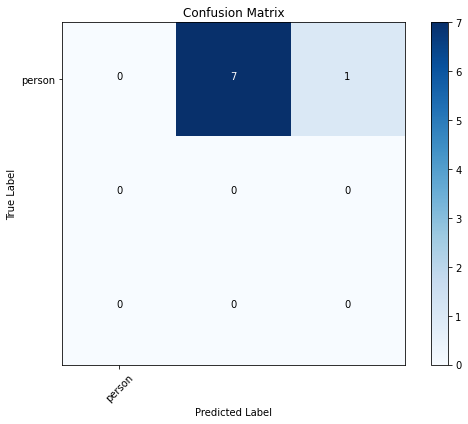

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Make predictions on the test set
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert labels to one-hot encoded format
one_hot_labels = to_categorical(labels)

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(one_hot_labels, axis=1), predicted_labels)

# Define class labels
class_labels = ['person']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

# Add labels to each cell
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


In [9]:
import cv2

# Load the new test images
test_images = [
    'a (1).jpg',
    'a (2).jpg',
    'a (2).jpg',
    'a (4).jpg',
    'a (5).jpg'
]

# Preprocess and predict the labels for the test images
for image_path in test_images:
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (32, 32))
    image = np.reshape(image, (1, 32, 32, 1))
    image = image.astype('float32') / 255.0
    
    # Predict the label
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)
    
    # Print the predicted label
    print("Image:", image_path)
    print("Predicted Label:", predicted_label)
    print()


1/1 [==============================] - 0s 16ms/step
Image: a (1).jpg
Predicted Label: 2

1/1 [==============================] - 0s 12ms/step
Image: a (2).jpg
Predicted Label: 2

1/1 [==============================] - 0s 31ms/step
Image: a (2).jpg
Predicted Label: 2

1/1 [==============================] - 0s 19ms/step
Image: a (4).jpg
Predicted Label: 2

1/1 [==============================] - 0s 19ms/step
Image: a (5).jpg
Predicted Label: 2



In [ ]:
import numpy as np
from PIL import Image
import keras
import cv2

# Preprocess the image
image_path = 'a (1).jpg'
image = Image.open(image_path)
image = image.resize((32, 32))  # Resize the image to match model input size
image = np.array(image)
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = gray_img.astype('float32') / 255.0  # Normalize pixel values
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Load the model
model = keras.models.load_model('model.h5')

# Perform inference
predictions = model.predict(image)

# Interpret the results
# Example: Get the predicted class label
predicted_class = np.argmax(predictions, axis=1)

# Draw bounding box on the actual image
image = cv2.imread(image_path)
image_height, image_width, _ = image.shape

# Define the bounding box coordinates (example: using random values)
x_min = 50
y_min = 50
x_max = 200
y_max = 200

# Draw the bounding box rectangle on the image
cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Display the image with bounding box
cv2.imshow('Image with Bounding Box', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 91ms/step


In [ ]:
model.save('model.h5')